<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [9]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

  Preparing metadata (setup.py) ... one
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 50.9 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 153.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 115.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=6d6a0382dd3bc34fa0f18e791f441a37bfed157748e3cf478267710ddd8583ed
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=fee5bd1cb29352b6fff4add29c65fdda418bd7fc30a0555434816cd2fe79bfa1
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/d

In [12]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ImportError: cannot import name 'convert_to_base64' from '_plotly_utils.utils' (/opt/conda/lib/python3.12/site-packages/_plotly_utils/utils.py)

In [14]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [15]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [16]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [17]:
# import yfinance as yf

# def analyze_tesla():
#     # Create Tesla ticker object
#     tsla = yf.Ticker("TSLA")
    
#     # Get basic info
#     info = tsla.info
#     print(f"=== TESLA MOTORS (TSLA) ===")
#     print(f"Company: {info.get('longName', 'N/A')}")
#     print(f"Sector: {info.get('sector', 'N/A')}")
#     print(f"Industry: {info.get('industry', 'N/A')}")
#     print(f"Market Cap: ${info.get('marketCap', 'N/A'):,}")
#     print(f"Current Price: ${info.get('currentPrice', 'N/A')}")
    
#     # Get historical data
#     hist = tsla.history(period="1mo")
#     print(f"\nLast month's price range:")
#     print(f"High: ${hist['High'].max():.2f}")
#     print(f"Low: ${hist['Low'].min():.2f}")
    
#     return tsla

# # Execute the function
# tesla_ticker = analyze_tesla()
import yfinance as yf
import pandas as pd

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")

# Get historical market data
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Save to CSV (optional)
tesla_data.to_csv('tesla_stock_data.csv', index=False)

# Display the first five rows using head()
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf

# URL of the Wikipedia page containing Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send a GET request to the website
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing quarterly revenue data
# Look for the table with Tesla Quarterly Revenue
tables = soup.find_all('table')

# Find the correct table (usually the second table on the page)
for table in tables:
    if 'Quarterly Revenue' in str(table):
        revenue_table = table
        break

# Extract data from the table
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

if 'revenue_table' in locals():
    for row in revenue_table.tbody.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            # Remove any $ signs and commas from revenue
            revenue = revenue.replace('$', '').replace(',', '')
            # Only add rows where revenue is not empty
            if revenue:
                tesla_revenue = pd.concat([tesla_revenue, 
                                         pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], 
                                        ignore_index=True)

# Convert Revenue to numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Display the last five rows using tail()
print("Last five rows of Tesla Revenue Data:")
print(tesla_revenue.tail())

Last five rows of Tesla Revenue Data:
          Date  Revenue
55  2011-12-31       39
56  2011-09-30       58
57  2011-06-30       58
58  2011-03-31       49
59  2010-12-31       36


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [4]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

NameError: name 'tesla_revenue' is not defined

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [20]:
import yfinance as yf
import pandas as pd

# Extract GameStop stock data
gme = yf.Ticker("GME")

# Get historical market data
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Save to CSV (optional)
gme_data.to_csv('gme_stock_data.csv', index=False)

# Display the first five rows using head()
print("First five rows of GME Stock Data:")
print(gme_data.head())

First five rows of GME Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page containing GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a GET request to the website
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table')

# Find the table containing quarterly revenue data
# Look for the table with GameStop Quarterly Revenue
quarterly_table = None
for table in tables:
    if 'Quarterly Revenue' in table.text:
        quarterly_table = table
        break

# Extract data from the quarterly revenue table
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

if quarterly_table is not None:
    for row in quarterly_table.tbody.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            # Remove any $ signs, commas, and potential text from revenue
            revenue = revenue.replace('$', '').replace(',', '').replace(' million', '')
            # Only add rows where revenue is not empty and is numeric
            if revenue and revenue.replace('.', '').isdigit():
                gme_revenue = pd.concat([gme_revenue, 
                                       pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], 
                                      ignore_index=True)

# Convert Revenue to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Display the last five rows using tail()
print("Last five rows of GameStop Revenue Data:")
print(gme_revenue.tail())

Last five rows of GameStop Revenue Data:
          Date  Revenue
55  2011-10-31     1947
56  2011-07-31     1744
57  2011-04-30     2281
58  2011-01-31     3693
59  2010-10-31     1899


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [24]:
import yfinance as yf
import pandas as pd

def make_graph(stock_data, title):
    """
    Create a simple text-based visualization
    """
    print(f"\n{'='*60}")
    print(f"📈 {title}")
    print(f"{'='*60}")
    
    # Display key statistics
    print(f"Date Range: {stock_data['Date'].min().strftime('%Y-%m-%d')} to {stock_data['Date'].max().strftime('%Y-%m-%d')}")
    print(f"Initial Price: ${stock_data['Close'].iloc[0]:.2f}")
    print(f"Final Price: ${stock_data['Close'].iloc[-1]:.2f}")
    print(f"Total Growth: {((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1) * 100:.2f}%")
    
    # Simple ASCII chart (for recent data)
    recent_data = stock_data.tail(20)
    max_price = recent_data['Close'].max()
    min_price = recent_data['Close'].min()
    
    print(f"\nRecent Price Trend (Last 20 trading days):")
    print("-" * 50)
    
    for i, row in recent_data.iterrows():
        price = row['Close']
        # Create a simple bar representation
        bar_length = int((price - min_price) / (max_price - min_price) * 30)
        bar = "█" * bar_length
        print(f"{row['Date'].strftime('%Y-%m-%d')}: ${price:8.2f} {bar}")

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Create the graph
make_graph(tesla_data, "Tesla (TSLA) Stock Price Analysis")


📈 Tesla (TSLA) Stock Price Analysis
Date Range: 2010-06-29 to 2025-10-24
Initial Price: $1.59
Final Price: $433.72
Total Growth: 27132.31%

Recent Price Trend (Last 20 trading days):
--------------------------------------------------
2025-09-29: $  443.21 ███████████████████
2025-09-30: $  444.72 ████████████████████
2025-10-01: $  459.46 ██████████████████████████████
2025-10-02: $  436.00 ██████████████
2025-10-03: $  429.83 ██████████
2025-10-06: $  453.25 █████████████████████████
2025-10-07: $  433.09 ████████████
2025-10-08: $  438.69 ████████████████
2025-10-09: $  435.54 ██████████████
2025-10-10: $  413.49 
2025-10-13: $  435.90 ██████████████
2025-10-14: $  429.24 ██████████
2025-10-15: $  435.15 ██████████████
2025-10-16: $  428.75 █████████
2025-10-17: $  439.31 ████████████████
2025-10-20: $  447.43 ██████████████████████
2025-10-21: $  442.60 ██████████████████
2025-10-22: $  438.97 ████████████████
2025-10-23: $  448.98 ███████████████████████
2025-10-24: $  433.72 ████

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 137.5 MB/s eta 0:00:00


<Figure size 1400x1000 with 0 Axes>

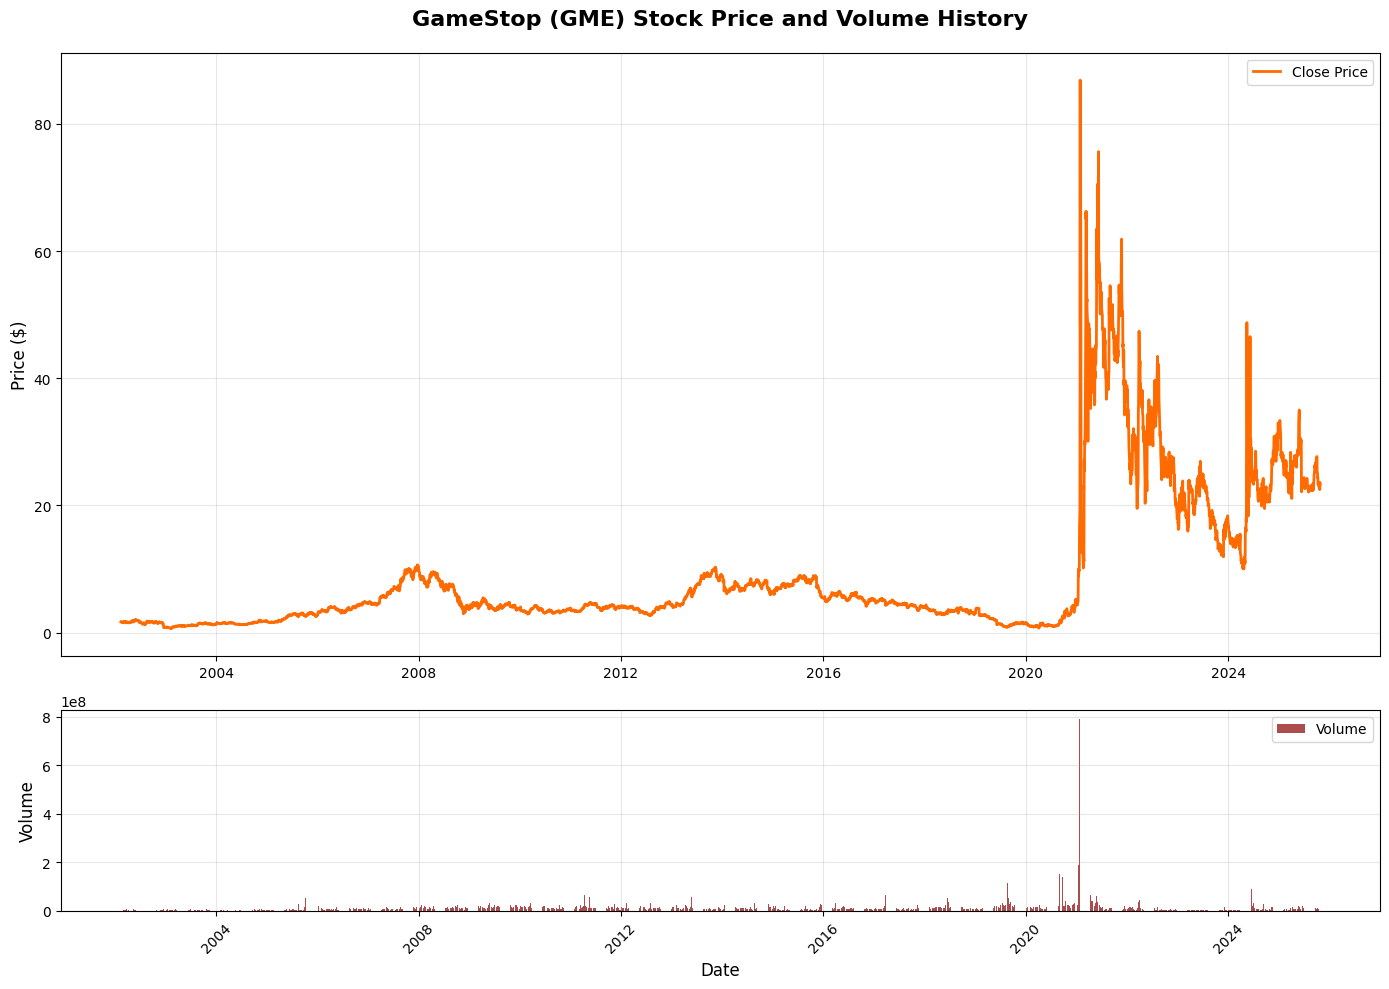

In [25]:
# First, ensure matplotlib is installed
try:
    import matplotlib.pyplot as plt
except ImportError:
    !pip install matplotlib
    import matplotlib.pyplot as plt

import yfinance as yf
import pandas as pd

def make_graph(stock_data, title):
    """
    Create a stock price graph with volume as subplot
    
    Parameters:
    stock_data (DataFrame): DataFrame containing stock data with Date, Close, and Volume columns
    title (str): Title for the graph
    """
    plt.figure(figsize=(14, 10))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})
    
    # Plot closing price on first subplot
    ax1.plot(stock_data['Date'], stock_data['Close'], color='#FF6B00', linewidth=2, label='Close Price')
    ax1.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot volume on second subplot
    ax2.bar(stock_data['Date'], stock_data['Volume'], color='#8B0000', alpha=0.7, label='Volume')
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Format x-axis dates
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Create the graph
make_graph(gme_data, "GameStop (GME) Stock Price and Volume History")

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
